In [1]:
import torch
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.nn.functional as F

In [2]:
ligands = ["TNF", "R84", "PIC", "P3K", "FLA", "CpG", "FSL", "LPS", "UST"]
polarization = ["", "ib", "ig", "i0", "i3", "i4"]
replicas, size = 2, 1288 # replicated

In [3]:
from core.getdata import *
from core.dataset import *

<h3>Example of GetData</h3>

In [4]:
TNFib1 = GetData(ligands[0], polarization[1], replicas, size)
TNFib1.X.shape

(1288, 98)

<h3>Example of Dataset</h3>

In [5]:
data = Dataset(ligands, polarization, replicas, size)

In [6]:
%%time
for _ in data:
    pass

Wall time: 35.7 ms


In [7]:
data.data.shape

(69552, 98, 1)

In [8]:
print(type(data.data), type(data.labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [9]:
print(data.labels, data.labels.shape) #labels are multi-hot encoded

[0 0 0 ... 8 8 8] (69552,)


<h3>Initializing Dataloaders</h3>

In [10]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [11]:
X_len, test_len = int(len(data.data) * 0.75), int(len(data.data) * 0.25)
train_len, val_len = int(X_len * 0.75), int(X_len * 0.25)
print(X_len, test_len, train_len, val_len) #lengths
print(X_len + test_len, len(data.data))

52164 17388 39123 13041
69552 69552


In [12]:
training_data = data.data.reshape(data.data.shape[0], data.data.shape[1], 1) #adds extra dimension

In [13]:
data.data[1000].shape
len(data)

69552

In [14]:
dataset_X, dataset_val = torch.utils.data.random_split(data, [X_len, test_len]) # need separate data and labels for LSTM?

In [15]:
dataloader_train = torch.utils.data.DataLoader(dataset_X, batch_size=64, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=64, shuffle=True)

In [16]:
print(len(dataloader_train), len(dataloader_val), len(dataloader_train) + len(dataloader_val))
###
#data[0:10]

816 272 1088


<h3>Model Training and Evaluation</h3>

In [17]:
from core.network import *
from core.trainer import *

In [18]:
torch.cuda.is_available()

True

In [19]:
#model parameters
input_size = 1
hidden_sizes = [10, 32]
output_size = 9

#training parameters
n_epochs = 300
batch_size = 64
learning_rate = 1e-3

In [20]:
model = LSTM(input_size, hidden_sizes, output_size, num_layers=3, device="cuda:0")
model.train()

LSTM(
  (lstm): LSTM(1, 10, batch_first=True)
  (fc1): Linear(in_features=10, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=9, bias=True)
)

In [21]:
trainer = LSTMTrainer(model=model, device="cuda:0")

In [22]:
trainer.train(dataloader_train, dataloader_val, batch_size=batch_size, n_epochs=n_epochs)

  0%|▎                                                                                 | 1/300 [00:05<26:53,  5.40s/it]

Epoch 001: | Training Loss: 2.1355346372606707 | Validation Loss: 2.0960307375473133


  1%|▌                                                                                 | 2/300 [00:09<21:50,  4.40s/it]

Epoch 002: | Training Loss: 2.0880196661341426 | Validation Loss: 2.0892733607222054


  1%|▊                                                                                 | 3/300 [00:12<20:09,  4.07s/it]

Epoch 003: | Training Loss: 2.091861480445254 | Validation Loss: 2.092499628663063


  1%|█                                                                                 | 4/300 [00:16<19:39,  3.99s/it]

Epoch 004: | Training Loss: 2.0865909416301576 | Validation Loss: 2.079174742102623


  2%|█▎                                                                                | 5/300 [00:20<18:54,  3.85s/it]

Epoch 005: | Training Loss: 2.092993404935388 | Validation Loss: 2.0870288093300426


  2%|█▋                                                                                | 6/300 [00:24<19:09,  3.91s/it]

Epoch 006: | Training Loss: 2.0736928319229797 | Validation Loss: 2.06558446629959


  2%|█▉                                                                                | 7/300 [00:28<18:56,  3.88s/it]

Epoch 007: | Training Loss: 2.1054321058532772 | Validation Loss: 2.1306694632067398


  3%|██▏                                                                               | 8/300 [00:31<18:47,  3.86s/it]

Epoch 008: | Training Loss: 2.1359728744216993 | Validation Loss: 2.1481421046397267


  3%|██▍                                                                               | 9/300 [00:35<18:54,  3.90s/it]

Epoch 009: | Training Loss: 2.1465211645060895 | Validation Loss: 2.143613064990324


  3%|██▋                                                                              | 10/300 [00:39<18:56,  3.92s/it]

Epoch 010: | Training Loss: 2.129451488309047 | Validation Loss: 2.1207947121823536


  4%|██▉                                                                              | 11/300 [00:44<20:11,  4.19s/it]

Epoch 011: | Training Loss: 2.147821708344946 | Validation Loss: 2.135391363326241


  4%|███▏                                                                             | 12/300 [00:49<20:29,  4.27s/it]

Epoch 012: | Training Loss: 2.1287627499185358 | Validation Loss: 2.1180451424682842


  4%|███▌                                                                             | 13/300 [00:52<19:48,  4.14s/it]

Epoch 013: | Training Loss: 2.1276692372618937 | Validation Loss: 2.13210591673851


  5%|███▊                                                                             | 14/300 [00:56<19:02,  4.00s/it]

Epoch 014: | Training Loss: 2.1112463408533264 | Validation Loss: 2.1050601215923535


  5%|████                                                                             | 15/300 [01:00<18:28,  3.89s/it]

Epoch 015: | Training Loss: 2.102216299404116 | Validation Loss: 2.095733473844388


  5%|████▎                                                                            | 16/300 [01:03<17:58,  3.80s/it]

Epoch 016: | Training Loss: 2.0921570852983233 | Validation Loss: 2.117408320746001


  6%|████▌                                                                            | 17/300 [01:07<17:35,  3.73s/it]

Epoch 017: | Training Loss: 2.1191649346375 | Validation Loss: 2.1158870072925793


  6%|████▊                                                                            | 18/300 [01:11<17:43,  3.77s/it]

Epoch 018: | Training Loss: 2.1226043178170335 | Validation Loss: 2.1343315603101956


  6%|█████▏                                                                           | 19/300 [01:15<18:27,  3.94s/it]

Epoch 019: | Training Loss: 2.125028649819832 | Validation Loss: 2.104425385594368


  7%|█████▍                                                                           | 20/300 [01:19<18:28,  3.96s/it]

Epoch 020: | Training Loss: 2.100194922557064 | Validation Loss: 2.079140512382283


  7%|█████▋                                                                           | 21/300 [01:23<18:20,  3.94s/it]

Epoch 021: | Training Loss: 2.0850942780574164 | Validation Loss: 2.071750201723155


  7%|█████▉                                                                           | 22/300 [01:27<18:25,  3.98s/it]

Epoch 022: | Training Loss: 2.1083278657466757 | Validation Loss: 2.1237622499465942


  8%|██████▏                                                                          | 23/300 [01:31<17:53,  3.87s/it]

Epoch 023: | Training Loss: 2.105258591911372 | Validation Loss: 2.086090385913849


  8%|██████▍                                                                          | 24/300 [01:34<17:25,  3.79s/it]

Epoch 024: | Training Loss: 2.0684207550743046 | Validation Loss: 2.087306799695772


  8%|██████▊                                                                          | 25/300 [01:38<17:02,  3.72s/it]

Epoch 025: | Training Loss: 2.1464434716047025 | Validation Loss: 2.1391544359571792


  9%|███████                                                                          | 26/300 [01:41<16:35,  3.63s/it]

Epoch 026: | Training Loss: 2.0979950749406626 | Validation Loss: 2.0534657853491165


  9%|███████▎                                                                         | 27/300 [01:45<16:23,  3.60s/it]

Epoch 027: | Training Loss: 2.0746753610232296 | Validation Loss: 2.0717094409115173


  9%|███████▌                                                                         | 28/300 [01:48<16:18,  3.60s/it]

Epoch 028: | Training Loss: 2.0576532439273945 | Validation Loss: 2.0452258380896904


 10%|███████▊                                                                         | 29/300 [01:52<16:26,  3.64s/it]

Epoch 029: | Training Loss: 2.094153856529909 | Validation Loss: 2.0923031542231056


 10%|████████                                                                         | 30/300 [01:56<17:07,  3.80s/it]

Epoch 030: | Training Loss: 2.0812553978141617 | Validation Loss: 2.0807735656990722


 10%|████████▎                                                                        | 31/300 [02:01<17:33,  3.92s/it]

Epoch 031: | Training Loss: 2.05269055769724 | Validation Loss: 2.0288017602527844


 11%|████████▋                                                                        | 32/300 [02:04<17:12,  3.85s/it]

Epoch 032: | Training Loss: 2.0560266382846177 | Validation Loss: 2.062755898517721


 11%|████████▉                                                                        | 33/300 [02:08<16:53,  3.80s/it]

Epoch 033: | Training Loss: 2.0758135277850953 | Validation Loss: 2.095180291463347


 11%|█████████▏                                                                       | 34/300 [02:12<16:52,  3.81s/it]

Epoch 034: | Training Loss: 2.094560347789643 | Validation Loss: 2.091679672107977


 12%|█████████▍                                                                       | 35/300 [02:15<16:37,  3.76s/it]

Epoch 035: | Training Loss: 2.0854064058147226 | Validation Loss: 2.1545914582469883


 12%|█████████▋                                                                       | 36/300 [02:19<16:47,  3.81s/it]

Epoch 036: | Training Loss: 2.11894560225454 | Validation Loss: 2.076069457566037


 12%|█████████▉                                                                       | 37/300 [02:23<16:50,  3.84s/it]

Epoch 037: | Training Loss: 2.0760844753069034 | Validation Loss: 2.1127986544195343


 13%|██████████▎                                                                      | 38/300 [02:27<17:11,  3.94s/it]

Epoch 038: | Training Loss: 2.080698196648383 | Validation Loss: 2.070070355254061


 13%|██████████▌                                                                      | 39/300 [02:31<17:02,  3.92s/it]

Epoch 039: | Training Loss: 2.097767024501866 | Validation Loss: 2.074665548170314


 13%|██████████▊                                                                      | 40/300 [02:35<16:53,  3.90s/it]

Epoch 040: | Training Loss: 2.0848927556299697 | Validation Loss: 2.0749908001983868


 14%|███████████                                                                      | 41/300 [02:39<17:08,  3.97s/it]

Epoch 041: | Training Loss: 2.123170856167288 | Validation Loss: 2.1563844838563133


 14%|███████████▎                                                                     | 42/300 [02:43<17:09,  3.99s/it]

Epoch 042: | Training Loss: 2.1427282062815687 | Validation Loss: 2.122005647596191


 14%|███████████▌                                                                     | 43/300 [02:48<17:27,  4.08s/it]

Epoch 043: | Training Loss: 2.101747366727567 | Validation Loss: 2.0715790675843464


 15%|███████████▉                                                                     | 44/300 [02:51<17:09,  4.02s/it]

Epoch 044: | Training Loss: 2.1058403392340623 | Validation Loss: 2.1506450903766297


 15%|████████████▏                                                                    | 45/300 [02:55<16:59,  4.00s/it]

Epoch 045: | Training Loss: 2.122510882715384 | Validation Loss: 2.117778002339251


 15%|████████████▍                                                                    | 46/300 [02:59<16:58,  4.01s/it]

Epoch 046: | Training Loss: 2.093266452060026 | Validation Loss: 2.0798319065395523


 16%|████████████▋                                                                    | 47/300 [03:03<16:17,  3.87s/it]

Epoch 047: | Training Loss: 2.069788871004301 | Validation Loss: 2.0781578601283184


 16%|████████████▉                                                                    | 48/300 [03:07<16:01,  3.82s/it]

Epoch 048: | Training Loss: 2.059585426221876 | Validation Loss: 2.0530024508343026


 16%|█████████████▏                                                                   | 49/300 [03:11<16:28,  3.94s/it]

Epoch 049: | Training Loss: 2.075925693354186 | Validation Loss: 2.0646776933880413


 17%|█████████████▌                                                                   | 50/300 [03:15<16:04,  3.86s/it]

Epoch 050: | Training Loss: 2.076585640071654 | Validation Loss: 2.0798869821078636


 17%|█████████████▊                                                                   | 51/300 [03:18<15:41,  3.78s/it]

Epoch 051: | Training Loss: 2.097233984692424 | Validation Loss: 2.1243987206150505


 17%|██████████████                                                                   | 52/300 [03:22<16:00,  3.87s/it]

Epoch 052: | Training Loss: 2.0977924340495875 | Validation Loss: 2.087064889862257


 18%|██████████████▎                                                                  | 53/300 [03:26<15:59,  3.89s/it]

Epoch 053: | Training Loss: 2.0766487824274042 | Validation Loss: 2.0686067439177456


 18%|██████████████▌                                                                  | 54/300 [03:30<15:40,  3.82s/it]

Epoch 054: | Training Loss: 2.0626914001563015 | Validation Loss: 2.0522269759984577


 18%|██████████████▊                                                                  | 55/300 [03:33<15:18,  3.75s/it]

Epoch 055: | Training Loss: 2.05240338427179 | Validation Loss: 2.0627431422472


 19%|███████████████                                                                  | 56/300 [03:37<15:01,  3.69s/it]

Epoch 056: | Training Loss: 2.04343940142323 | Validation Loss: 2.0283552732537773


 19%|███████████████▍                                                                 | 57/300 [03:40<14:42,  3.63s/it]

Epoch 057: | Training Loss: 2.0311532736408946 | Validation Loss: 2.025204782100285


 19%|███████████████▋                                                                 | 58/300 [03:44<14:27,  3.59s/it]

Epoch 058: | Training Loss: 2.023834016101033 | Validation Loss: 2.0282363413887867


 20%|███████████████▉                                                                 | 59/300 [03:47<14:17,  3.56s/it]

Epoch 059: | Training Loss: 2.012336032939892 | Validation Loss: 1.9945251626126907


 20%|████████████████▏                                                                | 60/300 [03:51<14:11,  3.55s/it]

Epoch 060: | Training Loss: 2.003822195179322 | Validation Loss: 1.9932658461963428


 20%|████████████████▍                                                                | 61/300 [03:55<14:11,  3.56s/it]

Epoch 061: | Training Loss: 1.9946732636468083 | Validation Loss: 1.982410186792121


 21%|████████████████▋                                                                | 62/300 [03:58<14:19,  3.61s/it]

Epoch 062: | Training Loss: 1.9880342648601999 | Validation Loss: 1.9778057047549416


 21%|█████████████████                                                                | 63/300 [04:02<14:17,  3.62s/it]

Epoch 063: | Training Loss: 1.9764161539428375 | Validation Loss: 1.9726009259329123


 21%|█████████████████▎                                                               | 64/300 [04:06<14:16,  3.63s/it]

Epoch 064: | Training Loss: 1.9719996404121904 | Validation Loss: 1.9670792642761679


 22%|█████████████████▌                                                               | 65/300 [04:09<14:18,  3.66s/it]

Epoch 065: | Training Loss: 1.9675483366145807 | Validation Loss: 1.9997536583858377


 22%|█████████████████▊                                                               | 66/300 [04:13<14:11,  3.64s/it]

Epoch 066: | Training Loss: 1.955706568325267 | Validation Loss: 1.925403307465946


 22%|██████████████████                                                               | 67/300 [04:16<14:05,  3.63s/it]

Epoch 067: | Training Loss: 1.9497383288016505 | Validation Loss: 1.9552381941500832


 23%|██████████████████▎                                                              | 68/300 [04:20<13:59,  3.62s/it]

Epoch 068: | Training Loss: 1.9525148097206564 | Validation Loss: 1.9633453676805777


 23%|██████████████████▋                                                              | 69/300 [04:24<13:54,  3.61s/it]

Epoch 069: | Training Loss: 1.9452752866873555 | Validation Loss: 1.9384971651084282


 23%|██████████████████▉                                                              | 70/300 [04:27<13:45,  3.59s/it]

Epoch 070: | Training Loss: 1.9884758879448854 | Validation Loss: 2.0593671307844272


 24%|███████████████████▏                                                             | 71/300 [04:31<13:35,  3.56s/it]

Epoch 071: | Training Loss: 2.028533239867173 | Validation Loss: 1.9959638600840288


 24%|███████████████████▍                                                             | 72/300 [04:34<13:24,  3.53s/it]

Epoch 072: | Training Loss: 1.9618232784902347 | Validation Loss: 1.9485660028808258


 24%|███████████████████▋                                                             | 73/300 [04:38<13:29,  3.56s/it]

Epoch 073: | Training Loss: 1.9443651629137058 | Validation Loss: 1.929316236254047


 25%|███████████████████▉                                                             | 74/300 [04:42<13:36,  3.61s/it]

Epoch 074: | Training Loss: 1.9330125527054656 | Validation Loss: 1.9218440730782116


 25%|████████████████████▎                                                            | 75/300 [04:45<13:35,  3.62s/it]

Epoch 075: | Training Loss: 1.9490573705703604 | Validation Loss: 1.9422341948922943


 25%|████████████████████▌                                                            | 76/300 [04:49<13:23,  3.59s/it]

Epoch 076: | Training Loss: 1.9467137863530832 | Validation Loss: 1.9448066055774689


 26%|████████████████████▊                                                            | 77/300 [04:52<13:27,  3.62s/it]

Epoch 077: | Training Loss: 1.9582365396268226 | Validation Loss: 1.9261027780525826


 26%|█████████████████████                                                            | 78/300 [04:56<13:17,  3.59s/it]

Epoch 078: | Training Loss: 1.9193115957519586 | Validation Loss: 1.9068979042417862


 26%|█████████████████████▎                                                           | 79/300 [04:59<13:06,  3.56s/it]

Epoch 079: | Training Loss: 1.9117094615803045 | Validation Loss: 1.9062986360753285


 27%|█████████████████████▌                                                           | 80/300 [05:03<12:57,  3.54s/it]

Epoch 080: | Training Loss: 1.9082446609641992 | Validation Loss: 1.8922307780560326


 27%|█████████████████████▊                                                           | 81/300 [05:06<12:51,  3.52s/it]

Epoch 081: | Training Loss: 1.8791138157248497 | Validation Loss: 1.8621269648565966


 27%|██████████████████████▏                                                          | 82/300 [05:10<12:47,  3.52s/it]

Epoch 082: | Training Loss: 1.8197381830975121 | Validation Loss: 1.793866192593294


 28%|██████████████████████▍                                                          | 83/300 [05:13<12:43,  3.52s/it]

Epoch 083: | Training Loss: 1.783612883120191 | Validation Loss: 1.7632863390095093


 28%|██████████████████████▋                                                          | 84/300 [05:17<12:42,  3.53s/it]

Epoch 084: | Training Loss: 1.775390457873251 | Validation Loss: 1.7546607869512894


 28%|██████████████████████▉                                                          | 85/300 [05:20<12:35,  3.51s/it]

Epoch 085: | Training Loss: 1.754208688934644 | Validation Loss: 1.7485602226327448


 29%|███████████████████████▏                                                         | 86/300 [05:24<12:35,  3.53s/it]

Epoch 086: | Training Loss: 1.7489817564686139 | Validation Loss: 1.739810366402654


 29%|███████████████████████▍                                                         | 87/300 [05:28<12:38,  3.56s/it]

Epoch 087: | Training Loss: 1.7643738543870402 | Validation Loss: 1.7292829927276163


 29%|███████████████████████▊                                                         | 88/300 [05:31<12:31,  3.54s/it]

Epoch 088: | Training Loss: 1.7336270600265147 | Validation Loss: 1.7228099199778892


 30%|████████████████████████                                                         | 89/300 [05:35<12:26,  3.54s/it]

Epoch 089: | Training Loss: 1.7298614074494325 | Validation Loss: 1.7301735382746248


 30%|████████████████████████▎                                                        | 90/300 [05:38<12:32,  3.59s/it]

Epoch 090: | Training Loss: 1.7234406392363941 | Validation Loss: 1.7040642907514292


 30%|████████████████████████▌                                                        | 91/300 [05:42<12:21,  3.55s/it]

Epoch 091: | Training Loss: 1.7184981097485506 | Validation Loss: 1.706594838815577


 31%|████████████████████████▊                                                        | 92/300 [05:46<12:35,  3.63s/it]

Epoch 092: | Training Loss: 1.7247756918271382 | Validation Loss: 1.744476925362559


 31%|█████████████████████████                                                        | 93/300 [05:49<12:36,  3.65s/it]

Epoch 093: | Training Loss: 1.7256015423758357 | Validation Loss: 1.714921672554577


 31%|█████████████████████████▍                                                       | 94/300 [05:53<12:34,  3.66s/it]

Epoch 094: | Training Loss: 1.711074455549904 | Validation Loss: 1.7048283477916437


 32%|█████████████████████████▋                                                       | 95/300 [05:57<12:41,  3.72s/it]

Epoch 095: | Training Loss: 1.7023295206474323 | Validation Loss: 1.6834378146073397


 32%|█████████████████████████▉                                                       | 96/300 [06:00<12:28,  3.67s/it]

Epoch 096: | Training Loss: 1.7006458120018828 | Validation Loss: 1.7058391290552475


 32%|██████████████████████████▏                                                      | 97/300 [06:04<12:21,  3.65s/it]

Epoch 097: | Training Loss: 1.7032511028296806 | Validation Loss: 1.6927561781862204


 33%|██████████████████████████▍                                                      | 98/300 [06:07<12:06,  3.59s/it]

Epoch 098: | Training Loss: 1.7086806379112542 | Validation Loss: 1.6967411225332933


 33%|██████████████████████████▋                                                      | 99/300 [06:11<11:54,  3.55s/it]

Epoch 099: | Training Loss: 1.7016687781787385 | Validation Loss: 1.8786072507500648


 33%|██████████████████████████▋                                                     | 100/300 [06:14<11:44,  3.52s/it]

Epoch 100: | Training Loss: 1.79931253165591 | Validation Loss: 1.7570705760051222


 34%|██████████████████████████▉                                                     | 101/300 [06:18<11:36,  3.50s/it]

Epoch 101: | Training Loss: 1.7249419112123696 | Validation Loss: 1.692225780995453


 34%|███████████████████████████▏                                                    | 102/300 [06:21<11:32,  3.49s/it]

Epoch 102: | Training Loss: 1.720778285580523 | Validation Loss: 1.6992136643213385


 34%|███████████████████████████▍                                                    | 103/300 [06:25<11:32,  3.52s/it]

Epoch 103: | Training Loss: 1.700367220330472 | Validation Loss: 1.6860037963179981


 35%|███████████████████████████▋                                                    | 104/300 [06:28<11:28,  3.51s/it]

Epoch 104: | Training Loss: 1.694489001643424 | Validation Loss: 1.6829458365545553


 35%|████████████████████████████                                                    | 105/300 [06:32<11:22,  3.50s/it]

Epoch 105: | Training Loss: 1.7077095152116288 | Validation Loss: 1.7694307495565975


 35%|████████████████████████████▎                                                   | 106/300 [06:35<11:16,  3.48s/it]

Epoch 106: | Training Loss: 1.717607157779675 | Validation Loss: 1.6854665923644514


 36%|████████████████████████████▌                                                   | 107/300 [06:39<11:11,  3.48s/it]

Epoch 107: | Training Loss: 1.6913923945497065 | Validation Loss: 1.6851448175661705


 36%|████████████████████████████▊                                                   | 108/300 [06:42<11:06,  3.47s/it]

Epoch 108: | Training Loss: 1.6859303401673542 | Validation Loss: 1.7146706918583197


 36%|█████████████████████████████                                                   | 109/300 [06:46<11:01,  3.47s/it]

Epoch 109: | Training Loss: 1.6918507503236042 | Validation Loss: 1.6914192569606445


 37%|█████████████████████████████▎                                                  | 110/300 [06:49<10:57,  3.46s/it]

Epoch 110: | Training Loss: 1.6952645937893904 | Validation Loss: 1.6914284641251844


 37%|█████████████████████████████▌                                                  | 111/300 [06:53<10:57,  3.48s/it]

Epoch 111: | Training Loss: 1.6903068562056505 | Validation Loss: 1.7035980803125046


 37%|█████████████████████████████▊                                                  | 112/300 [06:56<10:55,  3.49s/it]

Epoch 112: | Training Loss: 1.6872066956232576 | Validation Loss: 1.6776365572038818


 38%|██████████████████████████████▏                                                 | 113/300 [07:00<10:51,  3.48s/it]

Epoch 113: | Training Loss: 1.6999263414273076 | Validation Loss: 1.6831688946660828


 38%|██████████████████████████████▍                                                 | 114/300 [07:03<10:47,  3.48s/it]

Epoch 114: | Training Loss: 1.6825515849917543 | Validation Loss: 1.6743748113512993


 38%|██████████████████████████████▋                                                 | 115/300 [07:07<10:42,  3.47s/it]

Epoch 115: | Training Loss: 1.696907344694231 | Validation Loss: 1.720059400095659


 39%|██████████████████████████████▉                                                 | 116/300 [07:10<10:38,  3.47s/it]

Epoch 116: | Training Loss: 1.6936122462445615 | Validation Loss: 1.6762202211162622


 39%|███████████████████████████████▏                                                | 117/300 [07:14<10:34,  3.47s/it]

Epoch 117: | Training Loss: 1.683024852883582 | Validation Loss: 1.66914069959346


 39%|███████████████████████████████▍                                                | 118/300 [07:17<10:31,  3.47s/it]

Epoch 118: | Training Loss: 1.6710026226207322 | Validation Loss: 1.680665373802185


 40%|███████████████████████████████▋                                                | 119/300 [07:20<10:27,  3.46s/it]

Epoch 119: | Training Loss: 1.6783218228933858 | Validation Loss: 1.6606604290359162


 40%|████████████████████████████████                                                | 120/300 [07:24<10:27,  3.49s/it]

Epoch 120: | Training Loss: 1.666851450123039 | Validation Loss: 1.667099881259834


 40%|████████████████████████████████▎                                               | 121/300 [07:27<10:25,  3.50s/it]

Epoch 121: | Training Loss: 1.6636148537783062 | Validation Loss: 1.6544955293921864


 41%|████████████████████████████████▌                                               | 122/300 [07:31<10:20,  3.49s/it]

Epoch 122: | Training Loss: 1.6703778166396945 | Validation Loss: 1.6571345662369448


 41%|████████████████████████████████▊                                               | 123/300 [07:34<10:15,  3.48s/it]

Epoch 123: | Training Loss: 1.6663326079062386 | Validation Loss: 1.6578314067686306


 41%|█████████████████████████████████                                               | 124/300 [07:38<10:11,  3.47s/it]

Epoch 124: | Training Loss: 1.6601525872361427 | Validation Loss: 1.6497899946921013


 42%|█████████████████████████████████▎                                              | 125/300 [07:41<10:06,  3.47s/it]

Epoch 125: | Training Loss: 1.6566306332162781 | Validation Loss: 1.6527706963174484


 42%|█████████████████████████████████▌                                              | 126/300 [07:45<10:01,  3.46s/it]

Epoch 126: | Training Loss: 1.6669430807232857 | Validation Loss: 1.6570567786693573


 42%|█████████████████████████████████▊                                              | 127/300 [07:48<09:57,  3.45s/it]

Epoch 127: | Training Loss: 1.6558344580379187 | Validation Loss: 1.6485042278380955


 43%|██████████████████████████████████▏                                             | 128/300 [07:52<09:57,  3.47s/it]

Epoch 128: | Training Loss: 1.648857100702384 | Validation Loss: 1.6620673559167807


 43%|██████████████████████████████████▍                                             | 129/300 [07:55<09:56,  3.49s/it]

Epoch 129: | Training Loss: 1.6528659533051884 | Validation Loss: 1.643778363133178


 43%|██████████████████████████████████▋                                             | 130/300 [07:59<09:53,  3.49s/it]

Epoch 130: | Training Loss: 1.6463678799131338 | Validation Loss: 1.6431102770216324


 44%|██████████████████████████████████▉                                             | 131/300 [08:02<09:49,  3.49s/it]

Epoch 131: | Training Loss: 1.6464271543949258 | Validation Loss: 1.6484023284386187


 44%|███████████████████████████████████▏                                            | 132/300 [08:06<09:44,  3.48s/it]

Epoch 132: | Training Loss: 1.646148696687876 | Validation Loss: 1.644659045864554


 44%|███████████████████████████████████▍                                            | 133/300 [08:09<09:40,  3.47s/it]

Epoch 133: | Training Loss: 1.644596977561128 | Validation Loss: 1.6438211680335157


 45%|███████████████████████████████████▋                                            | 134/300 [08:13<09:35,  3.47s/it]

Epoch 134: | Training Loss: 1.6461775584840308 | Validation Loss: 1.6392430584220326


 45%|████████████████████████████████████                                            | 135/300 [08:16<09:31,  3.46s/it]

Epoch 135: | Training Loss: 1.6408297971767538 | Validation Loss: 1.6411817271043272


 45%|████████████████████████████████████▎                                           | 136/300 [08:20<09:28,  3.46s/it]

Epoch 136: | Training Loss: 1.6412132280130012 | Validation Loss: 1.6403398421757363


 46%|████████████████████████████████████▌                                           | 137/300 [08:23<09:28,  3.49s/it]

Epoch 137: | Training Loss: 1.6421025085682963 | Validation Loss: 1.6280004566206652


 46%|████████████████████████████████████▊                                           | 138/300 [08:27<09:25,  3.49s/it]

Epoch 138: | Training Loss: 1.6356079629531093 | Validation Loss: 1.6365267380195505


 46%|█████████████████████████████████████                                           | 139/300 [08:30<09:20,  3.48s/it]

Epoch 139: | Training Loss: 1.633069250221346 | Validation Loss: 1.631566171260441


 47%|█████████████████████████████████████▎                                          | 140/300 [08:33<09:16,  3.48s/it]

Epoch 140: | Training Loss: 1.6319025756389487 | Validation Loss: 1.6303378589013044


 47%|█████████████████████████████████████▌                                          | 141/300 [08:37<09:11,  3.47s/it]

Epoch 141: | Training Loss: 1.6657779212383663 | Validation Loss: 1.6751211399541182


 47%|█████████████████████████████████████▊                                          | 142/300 [08:40<09:08,  3.47s/it]

Epoch 142: | Training Loss: 1.6953245597142799 | Validation Loss: 1.687175164327902


 48%|██████████████████████████████████████▏                                         | 143/300 [08:44<09:02,  3.46s/it]

Epoch 143: | Training Loss: 1.6637014445720935 | Validation Loss: 1.6543823274619438


 48%|██████████████████████████████████████▍                                         | 144/300 [08:47<08:58,  3.45s/it]

Epoch 144: | Training Loss: 1.668217801580242 | Validation Loss: 1.6531605724902714


 48%|██████████████████████████████████████▋                                         | 145/300 [08:51<08:54,  3.45s/it]

Epoch 145: | Training Loss: 1.6529026837909924 | Validation Loss: 1.6441952678210594


 49%|██████████████████████████████████████▉                                         | 146/300 [08:54<08:53,  3.46s/it]

Epoch 146: | Training Loss: 1.6327552919586499 | Validation Loss: 1.6291218084447525


 49%|███████████████████████████████████████▏                                        | 147/300 [08:58<08:51,  3.48s/it]

Epoch 147: | Training Loss: 1.6327621019354053 | Validation Loss: 1.6234823044608622


 49%|███████████████████████████████████████▍                                        | 148/300 [09:01<08:47,  3.47s/it]

Epoch 148: | Training Loss: 1.6301122857075112 | Validation Loss: 1.6368022780208027


 50%|███████████████████████████████████████▋                                        | 149/300 [09:05<08:43,  3.47s/it]

Epoch 149: | Training Loss: 1.6254004250992746 | Validation Loss: 1.6289937912541277


 50%|████████████████████████████████████████                                        | 150/300 [09:08<08:40,  3.47s/it]

Epoch 150: | Training Loss: 1.6281517080816568 | Validation Loss: 1.6172817397643537


 50%|████████████████████████████████████████▎                                       | 151/300 [09:12<08:37,  3.47s/it]

Epoch 151: | Training Loss: 1.629260539132006 | Validation Loss: 1.6225556165856474


 51%|████████████████████████████████████████▌                                       | 152/300 [09:15<08:33,  3.47s/it]

Epoch 152: | Training Loss: 1.6440512191723375 | Validation Loss: 1.6876743251786512


 51%|████████████████████████████████████████▊                                       | 153/300 [09:19<08:29,  3.46s/it]

Epoch 153: | Training Loss: 1.6595899432021028 | Validation Loss: 1.6456639744779642


 51%|█████████████████████████████████████████                                       | 154/300 [09:22<08:29,  3.49s/it]

Epoch 154: | Training Loss: 1.6429993123108266 | Validation Loss: 1.6356399164480322


 52%|█████████████████████████████████████████▎                                      | 155/300 [09:26<08:24,  3.48s/it]

Epoch 155: | Training Loss: 1.6321074107990545 | Validation Loss: 1.6396785334629171


 52%|█████████████████████████████████████████▌                                      | 156/300 [09:29<08:20,  3.47s/it]

Epoch 156: | Training Loss: 1.6316560994760663 | Validation Loss: 1.6318320312044199


 52%|█████████████████████████████████████████▊                                      | 157/300 [09:32<08:16,  3.47s/it]

Epoch 157: | Training Loss: 1.6310805196271223 | Validation Loss: 1.6297205809284658


 53%|██████████████████████████████████████████▏                                     | 158/300 [09:36<08:12,  3.47s/it]

Epoch 158: | Training Loss: 1.6557205564835493 | Validation Loss: 1.6538006676470531


 53%|██████████████████████████████████████████▍                                     | 159/300 [09:39<08:08,  3.46s/it]

Epoch 159: | Training Loss: 1.6813567761404842 | Validation Loss: 1.6494048899587463


 53%|██████████████████████████████████████████▋                                     | 160/300 [09:43<08:14,  3.53s/it]

Epoch 160: | Training Loss: 1.6443701884617992 | Validation Loss: 1.6388437563882154


 54%|██████████████████████████████████████████▉                                     | 161/300 [09:47<08:20,  3.60s/it]

Epoch 161: | Training Loss: 1.6364949783858131 | Validation Loss: 1.6240757269894375


 54%|███████████████████████████████████████████▏                                    | 162/300 [09:51<08:24,  3.65s/it]

Epoch 162: | Training Loss: 1.6238505610940503 | Validation Loss: 1.6255137429517859


 54%|███████████████████████████████████████████▍                                    | 163/300 [09:55<08:33,  3.74s/it]

Epoch 163: | Training Loss: 1.6209203099795417 | Validation Loss: 1.6190565951606806


 55%|███████████████████████████████████████████▋                                    | 164/300 [09:58<08:35,  3.79s/it]

Epoch 164: | Training Loss: 1.621898143168758 | Validation Loss: 1.6457125036155476


 55%|████████████████████████████████████████████                                    | 165/300 [10:02<08:27,  3.76s/it]

Epoch 165: | Training Loss: 1.6192727996145977 | Validation Loss: 1.6159698428476559


 55%|████████████████████████████████████████████▎                                   | 166/300 [10:06<08:19,  3.73s/it]

Epoch 166: | Training Loss: 1.6158336767671155 | Validation Loss: 1.6060123263913042


 56%|████████████████████████████████████████████▌                                   | 167/300 [10:09<08:07,  3.66s/it]

Epoch 167: | Training Loss: 1.6162688472107345 | Validation Loss: 1.6166732149089085


 56%|████████████████████████████████████████████▊                                   | 168/300 [10:13<07:55,  3.60s/it]

Epoch 168: | Training Loss: 1.6153741153139693 | Validation Loss: 1.6156788336880066


 56%|█████████████████████████████████████████████                                   | 169/300 [10:16<07:45,  3.56s/it]

Epoch 169: | Training Loss: 1.61514043340496 | Validation Loss: 1.6239421407089514


 57%|█████████████████████████████████████████████▎                                  | 170/300 [10:20<07:39,  3.53s/it]

Epoch 170: | Training Loss: 1.6122359551635443 | Validation Loss: 1.6009052698226536


 57%|█████████████████████████████████████████████▌                                  | 171/300 [10:23<07:35,  3.53s/it]

Epoch 171: | Training Loss: 1.6098140596466906 | Validation Loss: 1.6324695125222206


 57%|█████████████████████████████████████████████▊                                  | 172/300 [10:27<07:30,  3.52s/it]

Epoch 172: | Training Loss: 1.606356756359923 | Validation Loss: 1.611583097892649


 58%|██████████████████████████████████████████████▏                                 | 173/300 [10:30<07:24,  3.50s/it]

Epoch 173: | Training Loss: 1.609027289730661 | Validation Loss: 1.6008064426919992


 58%|██████████████████████████████████████████████▍                                 | 174/300 [10:34<07:20,  3.49s/it]

Epoch 174: | Training Loss: 1.609769217523874 | Validation Loss: 1.6035224707687603


 58%|██████████████████████████████████████████████▋                                 | 175/300 [10:37<07:15,  3.48s/it]

Epoch 175: | Training Loss: 1.606831127960308 | Validation Loss: 1.6117910834796287


 59%|██████████████████████████████████████████████▉                                 | 176/300 [10:41<07:10,  3.47s/it]

Epoch 176: | Training Loss: 1.6070657552165144 | Validation Loss: 1.6355097008978619


 59%|███████████████████████████████████████████████▏                                | 177/300 [10:44<07:07,  3.47s/it]

Epoch 177: | Training Loss: 1.6067839608180756 | Validation Loss: 1.6085878106601097


 59%|███████████████████████████████████████████████▍                                | 178/300 [10:47<07:02,  3.46s/it]

Epoch 178: | Training Loss: 1.6026081945381911 | Validation Loss: 1.6044872350552504


 60%|███████████████████████████████████████████████▋                                | 179/300 [10:51<07:01,  3.48s/it]

Epoch 179: | Training Loss: 1.6161067084062333 | Validation Loss: 1.6105714247507208


 60%|████████████████████████████████████████████████                                | 180/300 [10:54<06:57,  3.48s/it]

Epoch 180: | Training Loss: 1.6035762256851382 | Validation Loss: 1.5946537931175793


 60%|████████████████████████████████████████████████▎                               | 181/300 [10:58<06:54,  3.48s/it]

Epoch 181: | Training Loss: 1.5971575862928933 | Validation Loss: 1.5962934708770584


 61%|████████████████████████████████████████████████▌                               | 182/300 [11:01<06:50,  3.48s/it]

Epoch 182: | Training Loss: 1.6005813305576642 | Validation Loss: 1.6084946087178063


 61%|████████████████████████████████████████████████▊                               | 183/300 [11:05<06:47,  3.48s/it]

Epoch 183: | Training Loss: 1.6032216798733263 | Validation Loss: 1.5955731846830423


 61%|█████████████████████████████████████████████████                               | 184/300 [11:08<06:43,  3.47s/it]

Epoch 184: | Training Loss: 1.5982503578359006 | Validation Loss: 1.6059387076426954


 62%|█████████████████████████████████████████████████▎                              | 185/300 [11:12<06:38,  3.47s/it]

Epoch 185: | Training Loss: 1.5989922927875144 | Validation Loss: 1.5940255851430052


 62%|█████████████████████████████████████████████████▌                              | 186/300 [11:15<06:34,  3.46s/it]

Epoch 186: | Training Loss: 1.5976093538543756 | Validation Loss: 1.589715669698575


 62%|█████████████████████████████████████████████████▊                              | 187/300 [11:19<06:30,  3.46s/it]

Epoch 187: | Training Loss: 1.600341065549383 | Validation Loss: 1.6011291913249914


 63%|██████████████████████████████████████████████████▏                             | 188/300 [11:22<06:29,  3.48s/it]

Epoch 188: | Training Loss: 1.5950646076132269 | Validation Loss: 1.5940225010409075


 63%|██████████████████████████████████████████████████▍                             | 189/300 [11:26<06:26,  3.48s/it]

Epoch 189: | Training Loss: 1.5962793745246588 | Validation Loss: 1.5992714197320097


 63%|██████████████████████████████████████████████████▋                             | 190/300 [11:29<06:22,  3.48s/it]

Epoch 190: | Training Loss: 1.6125702427006234 | Validation Loss: 1.6006311186972786


 64%|██████████████████████████████████████████████████▉                             | 191/300 [11:33<06:19,  3.48s/it]

Epoch 191: | Training Loss: 1.5956173936525981 | Validation Loss: 1.5891938152558662


 64%|███████████████████████████████████████████████████▏                            | 192/300 [11:36<06:15,  3.47s/it]

Epoch 192: | Training Loss: 1.5941435333852674 | Validation Loss: 1.5832161890233265


 64%|███████████████████████████████████████████████████▍                            | 193/300 [11:40<06:11,  3.47s/it]

Epoch 193: | Training Loss: 1.591379587264622 | Validation Loss: 1.5970889838302837


 65%|███████████████████████████████████████████████████▋                            | 194/300 [11:43<06:10,  3.49s/it]

Epoch 194: | Training Loss: 1.6481894234231873 | Validation Loss: 1.6224415170795776


 65%|████████████████████████████████████████████████████                            | 195/300 [11:47<06:19,  3.61s/it]

Epoch 195: | Training Loss: 1.6234313509627885 | Validation Loss: 1.6066624846528559


 65%|████████████████████████████████████████████████████▎                           | 196/300 [11:51<06:15,  3.61s/it]

Epoch 196: | Training Loss: 1.5998066207941841 | Validation Loss: 1.5964904778143938


 66%|████████████████████████████████████████████████████▌                           | 197/300 [11:54<06:17,  3.66s/it]

Epoch 197: | Training Loss: 1.5951587633759368 | Validation Loss: 1.6025640802348362


 66%|████████████████████████████████████████████████████▊                           | 198/300 [11:58<06:08,  3.61s/it]

Epoch 198: | Training Loss: 1.589861742129513 | Validation Loss: 1.5952167901046135


 66%|█████████████████████████████████████████████████████                           | 199/300 [12:01<06:01,  3.58s/it]

Epoch 199: | Training Loss: 1.5890818444245003 | Validation Loss: 1.5891507110174965


 67%|█████████████████████████████████████████████████████▎                          | 200/300 [12:05<05:55,  3.56s/it]

Epoch 200: | Training Loss: 1.591597428801013 | Validation Loss: 1.5945300990167786


 67%|█████████████████████████████████████████████████████▌                          | 201/300 [12:08<05:49,  3.53s/it]

Epoch 201: | Training Loss: 1.5909919218689788 | Validation Loss: 1.5908531792023604


 67%|█████████████████████████████████████████████████████▊                          | 202/300 [12:12<05:45,  3.53s/it]

Epoch 202: | Training Loss: 1.590628067214115 | Validation Loss: 1.5923745115013683


 68%|██████████████████████████████████████████████████████▏                         | 203/300 [12:15<05:42,  3.54s/it]

Epoch 203: | Training Loss: 1.5870267431817802 | Validation Loss: 1.58260367942207


 68%|██████████████████████████████████████████████████████▍                         | 204/300 [12:19<05:44,  3.59s/it]

Epoch 204: | Training Loss: 1.5948677866482268 | Validation Loss: 1.6021133564850862


 68%|██████████████████████████████████████████████████████▋                         | 205/300 [12:23<05:52,  3.71s/it]

Epoch 205: | Training Loss: 1.5861700021607035 | Validation Loss: 1.5900277977480608


 69%|██████████████████████████████████████████████████████▉                         | 206/300 [12:27<05:54,  3.77s/it]

Epoch 206: | Training Loss: 1.584733922107547 | Validation Loss: 1.591773790471694


 69%|███████████████████████████████████████████████████████▏                        | 207/300 [12:31<05:43,  3.69s/it]

Epoch 207: | Training Loss: 1.5828322341629104 | Validation Loss: 1.5810740252628046


 69%|███████████████████████████████████████████████████████▍                        | 208/300 [12:34<05:34,  3.63s/it]

Epoch 208: | Training Loss: 1.5791003642713322 | Validation Loss: 1.5804052900742083


 70%|███████████████████████████████████████████████████████▋                        | 209/300 [12:38<05:26,  3.59s/it]

Epoch 209: | Training Loss: 1.584290606134078 | Validation Loss: 1.5841370803468369


 70%|████████████████████████████████████████████████████████                        | 210/300 [12:41<05:20,  3.56s/it]

Epoch 210: | Training Loss: 1.5833034851387435 | Validation Loss: 1.5840212685220383


 70%|████████████████████████████████████████████████████████▎                       | 211/300 [12:45<05:14,  3.53s/it]

Epoch 211: | Training Loss: 1.5828338113485598 | Validation Loss: 1.5806586234008564


 71%|████████████████████████████████████████████████████████▌                       | 212/300 [12:48<05:09,  3.52s/it]

Epoch 212: | Training Loss: 1.5786023042073436 | Validation Loss: 1.5792287811636925


 71%|████████████████████████████████████████████████████████▊                       | 213/300 [12:52<05:18,  3.67s/it]

Epoch 213: | Training Loss: 1.5759866474305881 | Validation Loss: 1.5747278652646963


 71%|█████████████████████████████████████████████████████████                       | 214/300 [12:56<05:16,  3.68s/it]

Epoch 214: | Training Loss: 1.5783636102489396 | Validation Loss: 1.5857308866346584


 72%|█████████████████████████████████████████████████████████▎                      | 215/300 [12:59<05:11,  3.67s/it]

Epoch 215: | Training Loss: 1.5770852529242927 | Validation Loss: 1.5903772720519234


 72%|█████████████████████████████████████████████████████████▌                      | 216/300 [13:03<05:03,  3.62s/it]

Epoch 216: | Training Loss: 1.6061214378067092 | Validation Loss: 1.6049999235307468


 72%|█████████████████████████████████████████████████████████▊                      | 217/300 [13:06<04:57,  3.58s/it]

Epoch 217: | Training Loss: 1.5886605939298284 | Validation Loss: 1.5871622558025753


 73%|██████████████████████████████████████████████████████████▏                     | 218/300 [13:10<04:51,  3.56s/it]

Epoch 218: | Training Loss: 1.582057487292617 | Validation Loss: 1.5796435755841873


 73%|██████████████████████████████████████████████████████████▍                     | 219/300 [13:13<04:46,  3.53s/it]

Epoch 219: | Training Loss: 1.5839342356604689 | Validation Loss: 1.5830182823188164


 73%|██████████████████████████████████████████████████████████▋                     | 220/300 [13:17<04:41,  3.52s/it]

Epoch 220: | Training Loss: 1.5844470699336015 | Validation Loss: 1.5883779433720253


 74%|██████████████████████████████████████████████████████████▉                     | 221/300 [13:20<04:38,  3.53s/it]

Epoch 221: | Training Loss: 1.5824081129303165 | Validation Loss: 1.5857125192004091


 74%|███████████████████████████████████████████████████████████▏                    | 222/300 [13:24<04:39,  3.58s/it]

Epoch 222: | Training Loss: 1.5812659862579084 | Validation Loss: 1.5898956520592464


 74%|███████████████████████████████████████████████████████████▍                    | 223/300 [13:28<04:33,  3.55s/it]

Epoch 223: | Training Loss: 1.580865312148543 | Validation Loss: 1.5793573764317177


 75%|███████████████████████████████████████████████████████████▋                    | 224/300 [13:31<04:28,  3.54s/it]

Epoch 224: | Training Loss: 1.5775252729654312 | Validation Loss: 1.579719578518587


 75%|████████████████████████████████████████████████████████████                    | 225/300 [13:35<04:27,  3.56s/it]

Epoch 225: | Training Loss: 1.5792090656126248 | Validation Loss: 1.582238084253143


 75%|████████████████████████████████████████████████████████████▎                   | 226/300 [13:38<04:21,  3.54s/it]

Epoch 226: | Training Loss: 1.5772304705837195 | Validation Loss: 1.5770872301038574


 76%|████████████████████████████████████████████████████████████▌                   | 227/300 [13:42<04:16,  3.52s/it]

Epoch 227: | Training Loss: 1.5755490190258212 | Validation Loss: 1.5739419092150295


 76%|████████████████████████████████████████████████████████████▊                   | 228/300 [13:45<04:12,  3.50s/it]

Epoch 228: | Training Loss: 1.5726207449447875 | Validation Loss: 1.5762041478472597


 76%|█████████████████████████████████████████████████████████████                   | 229/300 [13:49<04:15,  3.60s/it]

Epoch 229: | Training Loss: 1.5716295461444294 | Validation Loss: 1.5757198793923153


 77%|█████████████████████████████████████████████████████████████▎                  | 230/300 [13:53<04:13,  3.63s/it]

Epoch 230: | Training Loss: 1.5708188046427334 | Validation Loss: 1.568339099340579


 77%|█████████████████████████████████████████████████████████████▌                  | 231/300 [13:57<04:17,  3.74s/it]

Epoch 231: | Training Loss: 1.5704939279193972 | Validation Loss: 1.573664401383961


 77%|█████████████████████████████████████████████████████████████▊                  | 232/300 [14:00<04:14,  3.74s/it]

Epoch 232: | Training Loss: 1.5711197936359573 | Validation Loss: 1.5954646625939537


 78%|██████████████████████████████████████████████████████████████▏                 | 233/300 [14:04<04:12,  3.76s/it]

Epoch 233: | Training Loss: 1.5697076817353566 | Validation Loss: 1.5735090006800259


 78%|██████████████████████████████████████████████████████████████▍                 | 234/300 [14:08<04:07,  3.76s/it]

Epoch 234: | Training Loss: 1.5680554294410873 | Validation Loss: 1.5671724786653238


 78%|██████████████████████████████████████████████████████████████▋                 | 235/300 [14:11<03:59,  3.68s/it]

Epoch 235: | Training Loss: 1.5679333591285873 | Validation Loss: 1.5691984997076147


 79%|██████████████████████████████████████████████████████████████▉                 | 236/300 [14:15<03:51,  3.62s/it]

Epoch 236: | Training Loss: 1.5649089810310626 | Validation Loss: 1.5659581435953869


 79%|███████████████████████████████████████████████████████████████▏                | 237/300 [14:18<03:45,  3.58s/it]

Epoch 237: | Training Loss: 1.568088543035236 | Validation Loss: 1.574735182173112


 79%|███████████████████████████████████████████████████████████████▍                | 238/300 [14:22<03:41,  3.57s/it]

Epoch 238: | Training Loss: 1.5649944495628862 | Validation Loss: 1.5721992074566729


 80%|███████████████████████████████████████████████████████████████▋                | 239/300 [14:25<03:36,  3.55s/it]

Epoch 239: | Training Loss: 1.563802335484355 | Validation Loss: 1.5668274365803774


 80%|████████████████████████████████████████████████████████████████                | 240/300 [14:29<03:32,  3.54s/it]

Epoch 240: | Training Loss: 1.5664906346914815 | Validation Loss: 1.5815617805894684


 80%|████████████████████████████████████████████████████████████████▎               | 241/300 [14:32<03:28,  3.53s/it]

Epoch 241: | Training Loss: 1.5621156071623166 | Validation Loss: 1.57852604284006


 81%|████████████████████████████████████████████████████████████████▌               | 242/300 [14:36<03:23,  3.52s/it]

Epoch 242: | Training Loss: 1.566212191739503 | Validation Loss: 1.6131624925662489


 81%|████████████████████████████████████████████████████████████████▊               | 243/300 [14:39<03:20,  3.51s/it]

Epoch 243: | Training Loss: 1.5679045779740108 | Validation Loss: 1.5760250827845406


 81%|█████████████████████████████████████████████████████████████████               | 244/300 [14:43<03:19,  3.57s/it]

Epoch 244: | Training Loss: 1.5622036440991889 | Validation Loss: 1.5615287291653015


 82%|█████████████████████████████████████████████████████████████████▎              | 245/300 [14:47<03:22,  3.68s/it]

Epoch 245: | Training Loss: 1.5619477692480181 | Validation Loss: 1.567442185300238


 82%|█████████████████████████████████████████████████████████████████▌              | 246/300 [14:51<03:24,  3.79s/it]

Epoch 246: | Training Loss: 1.5621495381289838 | Validation Loss: 1.5657871115733595


 82%|█████████████████████████████████████████████████████████████████▊              | 247/300 [14:55<03:21,  3.80s/it]

Epoch 247: | Training Loss: 1.55870313474945 | Validation Loss: 1.5663064911085016


 83%|██████████████████████████████████████████████████████████████████▏             | 248/300 [14:58<03:12,  3.71s/it]

Epoch 248: | Training Loss: 1.5592486468308113 | Validation Loss: 1.5599161741488121


 83%|██████████████████████████████████████████████████████████████████▍             | 249/300 [15:02<03:06,  3.65s/it]

Epoch 249: | Training Loss: 1.56238407042681 | Validation Loss: 1.58400940544465


 83%|██████████████████████████████████████████████████████████████████▋             | 250/300 [15:05<03:00,  3.61s/it]

Epoch 250: | Training Loss: 1.5795254764311455 | Validation Loss: 1.5664121184278936


 84%|██████████████████████████████████████████████████████████████████▉             | 251/300 [15:09<02:57,  3.62s/it]

Epoch 251: | Training Loss: 1.558677807742474 | Validation Loss: 1.562201056848554


 84%|███████████████████████████████████████████████████████████████████▏            | 252/300 [15:13<02:52,  3.59s/it]

Epoch 252: | Training Loss: 1.6817961272363569 | Validation Loss: 1.6323361992835999


 84%|███████████████████████████████████████████████████████████████████▍            | 253/300 [15:16<02:47,  3.56s/it]

Epoch 253: | Training Loss: 1.5805269213868123 | Validation Loss: 1.5667151160099928


 85%|███████████████████████████████████████████████████████████████████▋            | 254/300 [15:20<02:44,  3.57s/it]

Epoch 254: | Training Loss: 1.5599912193183805 | Validation Loss: 1.567706646726412


 85%|████████████████████████████████████████████████████████████████████            | 255/300 [15:23<02:42,  3.61s/it]

Epoch 255: | Training Loss: 1.5563742923093777 | Validation Loss: 1.5655037760734558


 85%|████████████████████████████████████████████████████████████████████▎           | 256/300 [15:27<02:38,  3.59s/it]

Epoch 256: | Training Loss: 1.5539335531054759 | Validation Loss: 1.5666256915120518


 86%|████████████████████████████████████████████████████████████████████▌           | 257/300 [15:30<02:33,  3.57s/it]

Epoch 257: | Training Loss: 1.5546018164239677 | Validation Loss: 1.5694178421707714


 86%|████████████████████████████████████████████████████████████████████▊           | 258/300 [15:34<02:30,  3.58s/it]

Epoch 258: | Training Loss: 1.5572509547951174 | Validation Loss: 1.556396043037667


 86%|█████████████████████████████████████████████████████████████████████           | 259/300 [15:38<02:26,  3.56s/it]

Epoch 259: | Training Loss: 1.5582801207315689 | Validation Loss: 1.573494665324688


 87%|█████████████████████████████████████████████████████████████████████▎          | 260/300 [15:41<02:21,  3.54s/it]

Epoch 260: | Training Loss: 1.5602473975980984 | Validation Loss: 1.5808647340711426


 87%|█████████████████████████████████████████████████████████████████████▌          | 261/300 [15:45<02:18,  3.56s/it]

Epoch 261: | Training Loss: 1.5693012906932364 | Validation Loss: 1.562095429529162


 87%|█████████████████████████████████████████████████████████████████████▊          | 262/300 [15:48<02:15,  3.57s/it]

Epoch 262: | Training Loss: 1.5972391922099918 | Validation Loss: 1.5825603626230185


 88%|██████████████████████████████████████████████████████████████████████▏         | 263/300 [15:52<02:11,  3.56s/it]

Epoch 263: | Training Loss: 1.5680817898874189 | Validation Loss: 1.5690054236089481


 88%|██████████████████████████████████████████████████████████████████████▍         | 264/300 [15:55<02:08,  3.56s/it]

Epoch 264: | Training Loss: 1.5599449174661262 | Validation Loss: 1.5630529632463175


 88%|██████████████████████████████████████████████████████████████████████▋         | 265/300 [15:59<02:04,  3.55s/it]

Epoch 265: | Training Loss: 1.5558079117361236 | Validation Loss: 1.56475167677683


 89%|██████████████████████████████████████████████████████████████████████▉         | 266/300 [16:03<02:01,  3.57s/it]

Epoch 266: | Training Loss: 1.5656183024539667 | Validation Loss: 1.5593882137361694


 89%|███████████████████████████████████████████████████████████████████████▏        | 267/300 [16:06<01:58,  3.59s/it]

Epoch 267: | Training Loss: 1.5557985730907495 | Validation Loss: 1.5647631178007406


 89%|███████████████████████████████████████████████████████████████████████▍        | 268/300 [16:10<01:54,  3.57s/it]

Epoch 268: | Training Loss: 1.554230470137269 | Validation Loss: 1.5727237528737854


 90%|███████████████████████████████████████████████████████████████████████▋        | 269/300 [16:13<01:49,  3.54s/it]

Epoch 269: | Training Loss: 1.5559561059755438 | Validation Loss: 1.5612003316774088


 90%|████████████████████████████████████████████████████████████████████████        | 270/300 [16:17<01:45,  3.53s/it]

Epoch 270: | Training Loss: 1.554774339000384 | Validation Loss: 1.5628372737590004


 90%|████████████████████████████████████████████████████████████████████████▎       | 271/300 [16:20<01:42,  3.54s/it]

Epoch 271: | Training Loss: 1.5514143340143502 | Validation Loss: 1.5659241571145899


 91%|████████████████████████████████████████████████████████████████████████▌       | 272/300 [16:24<01:39,  3.56s/it]

Epoch 272: | Training Loss: 1.609028818998851 | Validation Loss: 1.6104703313287567


 91%|████████████████████████████████████████████████████████████████████████▊       | 273/300 [16:27<01:35,  3.54s/it]

Epoch 273: | Training Loss: 1.578765141759433 | Validation Loss: 1.5823110285050728


 91%|█████████████████████████████████████████████████████████████████████████       | 274/300 [16:31<01:31,  3.53s/it]

Epoch 274: | Training Loss: 1.5601636489816741 | Validation Loss: 1.5621170993236935


 92%|█████████████████████████████████████████████████████████████████████████▎      | 275/300 [16:34<01:27,  3.52s/it]

Epoch 275: | Training Loss: 1.5613330681534374 | Validation Loss: 1.5604160463108736


 92%|█████████████████████████████████████████████████████████████████████████▌      | 276/300 [16:38<01:24,  3.51s/it]

Epoch 276: | Training Loss: 1.5545398224802578 | Validation Loss: 1.5571430211558062


 92%|█████████████████████████████████████████████████████████████████████████▊      | 277/300 [16:41<01:21,  3.54s/it]

Epoch 277: | Training Loss: 1.5517432076089523 | Validation Loss: 1.5583985504858635


 93%|██████████████████████████████████████████████████████████████████████████▏     | 278/300 [16:45<01:17,  3.53s/it]

Epoch 278: | Training Loss: 1.5487509634272725 | Validation Loss: 1.557200922685511


 93%|██████████████████████████████████████████████████████████████████████████▍     | 279/300 [16:49<01:15,  3.58s/it]

Epoch 279: | Training Loss: 1.5497579974871056 | Validation Loss: 1.5594883920515286


 93%|██████████████████████████████████████████████████████████████████████████▋     | 280/300 [16:52<01:11,  3.60s/it]

Epoch 280: | Training Loss: 1.550435905655225 | Validation Loss: 1.562601893701974


 94%|██████████████████████████████████████████████████████████████████████████▉     | 281/300 [16:56<01:07,  3.58s/it]

Epoch 281: | Training Loss: 1.5495153677229787 | Validation Loss: 1.5539379312711603


 94%|███████████████████████████████████████████████████████████████████████████▏    | 282/300 [16:59<01:04,  3.56s/it]

Epoch 282: | Training Loss: 1.5499427859105317 | Validation Loss: 1.569129055037218


 94%|███████████████████████████████████████████████████████████████████████████▍    | 283/300 [17:03<01:00,  3.54s/it]

Epoch 283: | Training Loss: 1.5505326917650653 | Validation Loss: 1.559118444866994


 95%|███████████████████████████████████████████████████████████████████████████▋    | 284/300 [17:06<00:56,  3.53s/it]

Epoch 284: | Training Loss: 1.5569868404783456 | Validation Loss: 1.5653360354549744


 95%|████████████████████████████████████████████████████████████████████████████    | 285/300 [17:10<00:52,  3.52s/it]

Epoch 285: | Training Loss: 1.545301372952321 | Validation Loss: 1.5548576787114143


 95%|████████████████████████████████████████████████████████████████████████████▎   | 286/300 [17:14<00:50,  3.59s/it]

Epoch 286: | Training Loss: 1.5451986694744988 | Validation Loss: 1.5576265796142466


 96%|████████████████████████████████████████████████████████████████████████████▌   | 287/300 [17:17<00:46,  3.61s/it]

Epoch 287: | Training Loss: 1.546847067042893 | Validation Loss: 1.5498706584467608


 96%|████████████████████████████████████████████████████████████████████████████▊   | 288/300 [17:21<00:43,  3.61s/it]

Epoch 288: | Training Loss: 1.5451717817900228 | Validation Loss: 1.552339568734169


 96%|█████████████████████████████████████████████████████████████████████████████   | 289/300 [17:25<00:39,  3.62s/it]

Epoch 289: | Training Loss: 1.5448021640380223 | Validation Loss: 1.5533781998297747


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 290/300 [17:28<00:36,  3.62s/it]

Epoch 290: | Training Loss: 1.6067294853867269 | Validation Loss: 1.6716762746081633


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 291/300 [17:32<00:32,  3.62s/it]

Epoch 291: | Training Loss: 1.5770856193175502 | Validation Loss: 1.5573644480284523


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 292/300 [17:35<00:29,  3.64s/it]

Epoch 292: | Training Loss: 1.54197804396059 | Validation Loss: 1.5533655088614016


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 293/300 [17:39<00:25,  3.67s/it]

Epoch 293: | Training Loss: 1.5461275706104203 | Validation Loss: 1.5576995435883016


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 294/300 [17:43<00:21,  3.64s/it]

Epoch 294: | Training Loss: 1.5455162466010626 | Validation Loss: 1.5616154486642164


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 295/300 [17:46<00:17,  3.58s/it]

Epoch 295: | Training Loss: 1.5481767530242603 | Validation Loss: 1.553397528388921


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 296/300 [17:50<00:14,  3.58s/it]

Epoch 296: | Training Loss: 1.5416753781484622 | Validation Loss: 1.5497406957780613


 99%|███████████████████████████████████████████████████████████████████████████████▏| 297/300 [17:54<00:10,  3.63s/it]

Epoch 297: | Training Loss: 1.5405866107812114 | Validation Loss: 1.5555328240289408


 99%|███████████████████████████████████████████████████████████████████████████████▍| 298/300 [17:57<00:07,  3.67s/it]

Epoch 298: | Training Loss: 1.5474368402478742 | Validation Loss: 1.5511077541638822


100%|███████████████████████████████████████████████████████████████████████████████▋| 299/300 [18:01<00:03,  3.68s/it]

Epoch 299: | Training Loss: 1.5428603234536507 | Validation Loss: 1.5555786214330618


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [18:05<00:00,  3.62s/it]

Epoch 300: | Training Loss: 1.5408327614559847 | Validation Loss: 1.5446779662195373


In [23]:
# dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=32, shuffle=True, num_workers=4)
# dic = {"y_pred": np.array([]), "y_true": np.array([])}
# for x_batch, y_batch in dataloader_val:
#     x_batch, y_batch = x_batch.to(self.device), y_batch.to(self.device)
#     # to do : convert y_batch to np array and vstack it y_true
#     y_batch = y_batch.detach().cpu().numpy()
#     dic[y_true].vstack(y_true, y_batch)
#     y_pred = trainer.model(x_batch)
#     y_pred = F.softmax(y_pred, dim=1)
#     # to do : convert to np array and vstack it to y_pred
#     y_pred = y_pred.detach().cpu().numpy()
#     dic[y_pred].vstack(y_pred)
    
# df = pd.DataFrame(dic)

In [24]:
torch.cuda.empty_cache()
x_batch, y_batch = dataset_val[0:10000]
# to do : convert x_batch to tensor and send to gpu 
x_batch = torch.tensor(x_batch, device=torch.device("cuda:0"))
y_pred = trainer.model(x_batch)
y_pred = F.softmax(y_pred, dim=1)
# to do : convert to np array and vstack it to y_pred
y_pred = y_pred.detach().cpu().numpy()
y_pred = np.argmax(y_pred, axis=1)
dic = {"y_pred": y_pred, "y_true": y_batch}

df = pd.DataFrame(dic)

In [25]:
df

,y_pred,y_true
0,2,4
1,3,3
2,7,3
3,5,4
4,3,5
...,...,...
9995,1,2
9996,2,2
9997,2,4
9998,8,7


In [26]:
sum(df["y_pred"] == df["y_true"])/10000

0.4342

In [27]:
import pickle
import os
torch.save(model.state_dict(), 'models/lstm2.pth')

<h3>Plots</h3>

In [28]:
import matplotlib.pyplot as plt

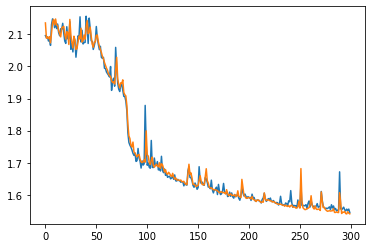

In [29]:
plt.plot(trainer.val_losses)
plt.plot(trainer.train_losses)

In [30]:
#lstm2 : replicated dataset